<a href="https://colab.research.google.com/github/KauaHenSilva/python_facial_detection/blob/main/face_detection_using_IBPH/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from PIL import Image
import cv2
import numpy as np
import os
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn


### Setup

In [7]:
import requests
import zipfile
import shutil

def download_large_file_from_google_drive(file_id, destination):
    base_url = "https://drive.google.com/uc?export=download"

    with requests.Session() as session:
        response = session.get(base_url, params={'id': file_id}, stream=True)
        for key, value in response.cookies.items():
            if key.startswith('download_warning'):
                confirm_token = value
                break
        else:
            confirm_token = None

        if confirm_token:
            params = {'id': file_id, 'confirm': confirm_token}
            response = session.get(base_url, params=params, stream=True)

        # Escrever o conteúdo do arquivo no destino
        with open(destination, 'wb') as f:
            for chunk in response.iter_content(32768):
                f.write(chunk)

download_large_file_from_google_drive('1l2wyk0--oFj_agtV2MuTPkkvfGZatTnN', 'yalefaces.rar')

with zipfile.ZipFile('yalefaces.rar', 'r') as zip_ref:
    zip_ref.extractall('yalefaces_temp')

if not os.path.exists('yalefaces'):
    shutil.move('yalefaces_temp/yalefaces', 'yalefaces')

shutil.rmtree('yalefaces_temp')
os.remove('yalefaces.rar')

In [8]:
filesPATH = [os.path.join("yalefaces/train", f) for f in os.listdir("yalefaces/train")]
faces = []
ids = []

print("Start reading images")
for file in filesPATH:
    img = Image.open(file).convert("L")
    img_np = np.array(img, "uint8")
    faces.append(img_np)
    ids.append(int(file.split("subject")[1].split(".")[0]))
print("End reading images")

Start reading images
End reading images


In [9]:
lbph_classifier = cv2.face.LBPHFaceRecognizer.create(4, 12, 9, 9)
print("Training...")
lbph_classifier.train(faces, np.array(ids))
print("Training completed")

print("Start writing model to file")
lbph_classifier.write("lbph_classifier.yml")
print("Model saved")

Training...
Training completed
Start writing model to file
Model saved


In [10]:
print("Reading model")
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('lbph_classifier.yml')
print("Model read")

Reading model
Model read


Accuracy: 0.7333333333333333


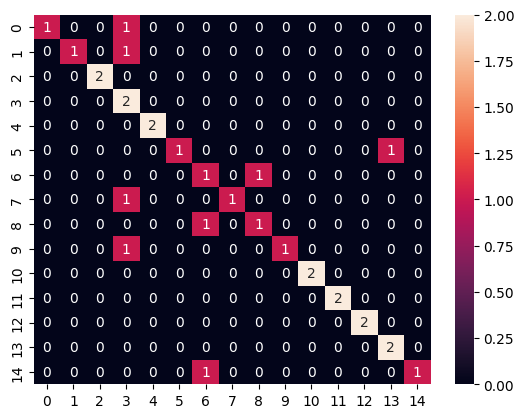

In [11]:
# Test

test_filesPATH = [os.path.join("yalefaces/test", f) for f in os.listdir("yalefaces/test")]

prev = []
expeded = []

for file in test_filesPATH:
    img = Image.open(file).convert("L")
    img_np = np.array(img, "uint8")

    pred, _ = lbph_face_classifier.predict(img_np)
    expected = int(file.split("subject")[1].split(".")[0])

    prev.append(pred)
    expeded.append(expected)

accuracy = accuracy_score(expeded, prev)
print("Accuracy: " + str(accuracy))

seaborn.heatmap(confusion_matrix(expeded, prev), annot=True);
